In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, "/home/max/Github/Magnetic-Reconnection-Visualization/src")
from mrvis.algorithms import *
from mrvis.utils import save_as_vti

size = 64

xmin, xmax = -3, 3
ymin, ymax = -1, 4
zmin, zmax = -3, 3

linx = np.linspace(xmin, xmax, size)
liny = np.linspace(ymin, ymax, size)
linz = np.linspace(zmin, zmax, size)

origin = [linx[0], liny[0], linz[0]]
spacing = [linx[1] - linx[0], liny[1] - liny[0], linz[1] - linz[0]]

x, y, z = np.meshgrid(linx, liny, linz, indexing="ij")

field = np.array([
    (y -2) ** 2 - 1 + z**2,
    -x,
    np.ones(x.shape) * 1.0
])

save_as_vti(field, None, origin=origin, spacing=spacing, savepath="~/Temp/", name="book1-vector-field")

In [2]:
result = convective_acceleration(field, linx, liny, linz)
save_as_vti(result, None, origin=origin, spacing=spacing, savepath="./", name="book1-convective-acceleration")

result = parallel_vector_operator(field, linx, liny, linz)
save_as_vti(result, None, origin=origin, spacing=spacing, savepath="./", name="book1-parallel-vectors")

result = shear_layer(field, linx, liny, linz)
save_as_vti(result, None, origin=origin, spacing=spacing, savepath="./", name="book1-shear-layer")

# Finding Critical Points in 2D

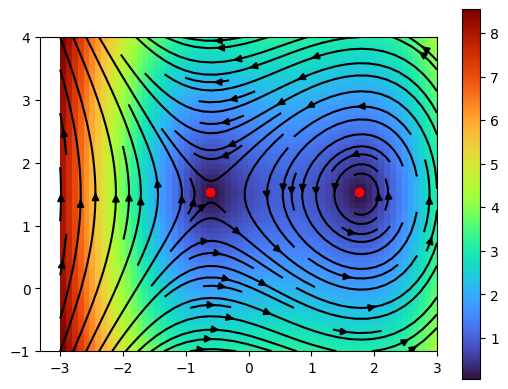

In [17]:
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max

u = np.sqrt(field[1, :, :, size//2] ** 2 + field[0, :, :, size//2] ** 2)

coordinates = peak_local_max(-u, min_distance=10)

plt.imshow(u, cmap="turbo", extent=[xmin, xmax, ymin, ymax])
plt.colorbar()
plt.streamplot(x[:, :, 0].T, y[:, :, 0].T, field[1, :, :, size//2], field[0, :, :, size//2], color="black")
plt.plot(linx[coordinates[:, 1]], liny[coordinates[:, 0]], "ro")